# Data Science Project - Support Vector Machine Demonstration
___

## 1. Project Purpose - Demo and explain (binary) support vector machine classification
This notebook was created for two reasons:

1. Primarily, to outline an example of how to create a (binary) support vector machine model and apply it to some (artificial) data and,
- Secondarily, to introduce the underlying theory of support vector machines as supplemental information.

A support vector machine (herein SVM) model in its most simple form is very similar to a linear regression model, as it uses the linear discriminant function:

$$f(x_i) = w^Tx_i +b$$

Where a linear regression model uses the above function to predict a **continuous** output variable, an SVM model predicts a **categorical** output variable (like in logistic regression), hence the use of the term *discriminant*. Thus, a binary SVM model can be repesented by this equation:

$$\hat y = f(x_i) = w^Tx_i + b \begin{cases}
    \geq 0, & \hat y = +1 .\\
    \lt 0, & \hat y = -1.
  \end{cases}
  $$
  
Where $\hat y$ is our predicted class, with $+1$ representing one category (or class) and $-1$ representing the other category.

The goal of a (simple linear) SVM model is not explicitly to maximize the prediction accuracy, but to find a linear discriminant function, or **decision boundary**, that *best* divides the two classes. For an SVM model, the *best* decision boundary is one that **maximizes** the the margin between two the classes. I.e. the *best* division **maximizes** the shortest (perpendicular) distance the class instances closest to the division.

To **fit an SVM model** to some data is to estimate the **optimal model parameters ($w$ and $b$)** based on some sort of evaluation criteria involving said data.

## 2. Data Source - Generate 3D data with binary dependent variable
For this demonstration, the data needed to create a simple 2D SVM model will be generated directly. **Simple** in this case implies only two classes for the **dependent variable**, therefore we need a set of $(x_1,x_2,y)$ triplets to represent our 2D data $(x_1,x_2)$ and its class $(y)$, the dependent variable. The $x_i$ values, our indepedent variables, have continuous values. This demo will use a binomial dependent variable, i.e. $y$ will have two classes, the binary ouputs either $-1$ or $1$.

In [4]:
#Numpy will be used to generate the data
import numpy as np

#Define our true model parameters. 
#These parameters were chosen since they are Pythagorean triples.
#A Pythagorean triple is a set of 3 integer values that have a vector length that is also an integer.
b = -8
w_1 = 16
w_2 = 2

#Determine our data generation parameters
np.random.seed(0)
num_data_points = 5000

#Generate the independent variables
x1 = np.random.rand(num_data_points)
x2 = np.random.rand(num_data_points)

#Generate the dependent variables
y = 2 * ((w_1*x1+w_2*x2+b)>0) - 1

#Summarize the model
print("\nThe true decision boundary equation coefficients:\nb = {}  \
            \nw_1 = {} \
            \nw_2 = {}"
      .format(b,w_1,w_2)) 
print("\n The decision boundary equation coefficients have a vector length of : \n||w|| = {}"
      .format(np.sqrt(b**2+w_1**2+w_2**2)))


The true decision boundary equation coefficients:
b = -8              
w_1 = 16             
w_2 = 2

 The decision boundary equation coefficients have a vector length of : 
||w|| = 18.0


## 3. Data Structure and Quality - Visualize the data using colour coded scatterplots
Since we generated our data, we don't need to clean it, just visualize it. For a real-world data science project, cleaning data is very important.

Here we visualize the division boundary and the differently labelled class on each side of the decision boundary.

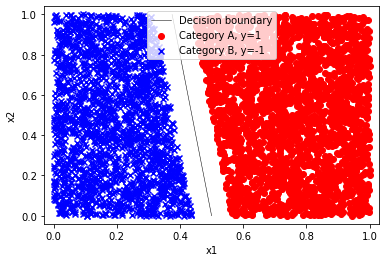

In [5]:
#Matplotlib will be used to visualize the data
import matplotlib.pyplot as plt

#Create a figure to add multiple plots to
fig = plt.figure()
fig1 = fig.add_subplot(111)

#Generate the class seperator line
#Apply the model parameters to the linear discriminant function to determine the x1, x2 coordinates of the line
l2 = np.linspace(max(x2[y==-1]),min(x2[y==1]),5)
#w_1 * l1 + w_2 * l2  + b = 0, y = m * x + b, y-> l1, b-> -b / w_1, m-> -w_2 / w_1
l1 = -b / w_1 - w_2 / w_1 * l2

#Keep only the instances that lie outside the decision boundary margin.
#(Those that have a distance greater than 1 from the decision boundary)
outside_margin = ((w_1*x1+w_2*x2+b)*y)>1
y = y[outside_margin]
x1 = x1[outside_margin]
x2 = x2[outside_margin]

#Add scatter plots of both classes of data
fig1.scatter(x1[y==1],x2[y==1],c="r", marker="o", label="Category A, y=1");
fig1.scatter(x1[y==-1],x2[y==-1],c="b", marker="x", label="Category B, y=-1");

#Plot the seperator line
fig1.plot(l1,l2,c='k',linewidth=0.5, label="Decision boundary")

#Add labelling to the plot
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis((-0.03,1.03, -0.04, 1.04))
plt.show()

## 4. Data Model - Compute support vector discriminant function coefficients

A support vector machine model can be fit using  **gradient descent** applied to two different problem formulations:

1. SVM Primal formulation
2. SVM Dual formulation

Both techniques aim to minimize a loss function,  $J(w_{0−𝑛})$ , which the model creator must decide.

Technique 1 applies a (sub) gradient descent to a loss function based on measuring the error of every instance in our data set.

Technique 2 applies gradient descent to a loss function that uses Lagrange multipliers applied to the instances in our data set.

This demonstration will apply the first technique. While the second technique is more popular in the literature, the first technique can be explained more easily and simply.

### Solving the SVM Primal formulation using gradient descent

The essence of the SVM primal formulation is to define a loss function based on 
1. The class of any given point
1. The shortest (perpendicular) distance from any given point to the decision boundary
1. The model parameter vector $W$

Essentially, if an instance is classified correctly, it generates no loss. If it is classified incorrectly, the loss is proportional to the distance to the decision boundary. In words, the loss we want to define is: 
$$LOSS = DISTANCE_{to\,decision\,boundary}*CORRECTNESS_{of\,class\,label}\tag{Descriptive}$$

The equation to find the 2D distance from a point $X(x_1,x_2)$ to a line (our decision boundary) $W(w_1,w_2)$ is :
$$ D = (\dfrac{W}{||W||})^TX+\dfrac{b}{||W||}$$

Or, more generally, we can combine our weight vector $W$ and bias value $b$ into one vector, i.e. $W(b,w_1,w_2)$, by adding a 1 to our feature vector, i.e, $X = X(1,x_1,x_2)$, and the distance function is simplified:
$$ D = (\dfrac{W}{||W||})^TX$$

This equation can be derived from some simple geometric algebra.

First, a vector perpendicular to the decision boundary line has the same coefficients as the decision boundary line weight vector $W$, and therefore a unit vector (vector of length $1$) perpendicular to the seperator is 
$$\overrightarrow{W}=\dfrac{W}{||W||}$$

Secondly, any point on our decision boundary satisfies the decision boundary equation:
$$W^TX=0$$

So if we start at our point $X$ and move distance $D$ perpendicualrly ($\dfrac{W}{||W||}$) towards our decision boundary, we'll arrive at a point on the boundary (say, $X_0$), which will satisfy the decision boundary equation. Putting this together in terms of equations:
$$X-D\dfrac{W}{||W||}=X_0$$
$$W^TX_0=0$$
Therefore:
$$W^T(X-D\dfrac{W}{||W||})=0$$
Solving for $D$, and recalling that $||W|| = \sqrt{W\cdot W}=(W\cdot W)^{\frac{1}{2}}$ and $W^TW=W\cdot W$, yields:
$$ D = (\dfrac{W}{||W||})^TX$$

One final correction to our distance function is to include the instance class label, as without it the distance function we found would be **positive** on one side of the decision boundary and **negative** on the other side of the decision boundary. By defining our two dependent class labels, $y$ as either $-1$ or $1$, we can make our distance measure positive if the label is correct and negative if the label is incorrect. Notice how this equation fits the $\text{(Descriptive)}$ version of our equation.
$$ D_i = y_i(\dfrac{W}{||W||})^TX_i\tag{Distance}$$

Based on our $\text{(Distance)}$ equation, we can infer that minimzing $||W||$ will maximize the distance, i.e. the margin, to the decision boundary, as long as we maintain (constrain) that $y_iW^TX_i$ is positive, i.e. $>0$. This will result in our maximum distance for each point from the decision boundary, and thus occurs at our optimal $W$ vector. Since we're using $y_iW^TX_i$ to make our class predictions ($\hat y = \pm 1$), we change our loss from $y_iW^TX_i>0$ to $y_iW^TX_i>1$, meaning the points closest to the decision boundary don't produce almost $0$ for our optimal $W$ vector, but produce a value of $1$. This is where the term support vector comes from, because the points closest to the decision boundary **support** the decision boundary parameter **vector**.

Given this new constraint ($y_iW^TX_i>1$ or $y_iW^TX_i-1>0$), we can define our loss (this is called **Hinge Loss**) as for any point that has a distance to the decision boundary of less than $1$, the loss is that distance from $1$:
$$J(W) = \begin{cases}
    0, & \text{if }&y_iW^TX_i\geq1\\
    1-y_iW^TX_i, & \text{otherwise. i.e. } &y_iW^TX_i<1
  \end{cases}$$
  
Here, we've removed the $\dfrac{1}{||W||}$ from the equation, since we know we're trying to minimize ${||W||}$. Thus, we re-add ${||W||}$ directly into our loss function. ${||W||}$ is what's called a **regularization** parameter, since it controls the size of the coefficients of th $W$ vector. We don't want to just control their size, we want to actively minimize their vector length. So the loss function with regularization is:

$$J(W) = \begin{cases}
    ||W||, & \text{if }&y_iW^TX_i\geq1\\
    1-y_iW^TX_i + ||W||, & \text{otherwise. i.e. } &y_iW^TX_i<1
  \end{cases}$$

And now we simply need to compute the gradient of this equation. However, to make our gradient computation more easy, we change our regularization parameter to be $\dfrac{1}{2}||W||^2$, since minimizing $\dfrac{1}{2}||W||^2$ is the same as minimizing $||W||$, and the gradient of $\dfrac{1}{2}||W||^2$, evaluates back to $||W||$. So our final loss function and its gradient are:
$$J(W) = \begin{cases}
    \dfrac{1}{2}||W||^2, & \text{if }&y_iW^TX_i\geq1\\
    1-y_iW^TX_i + \dfrac{1}{2}||W||^2, & \text{otherwise. i.e. } &y_iW^TX_i<1
  \end{cases}$$

$$\nabla J(W) = \begin{cases}
    ||W||, & \text{if }&y_iW^TX_i\geq1\\
    -y_iX_i + ||W||, & \text{otherwise. i.e. } &y_iW^TX_i<1
  \end{cases}$$

The final step is to decide how important our regularization is. We add in C, a hyper parameter that tunes the weight of the regularization. 

$$\nabla J(W) = \begin{cases}
    C||W||, & \text{if }&y_iW^TX_i\geq1\\
    -y_iX_i + C||W||, & \text{otherwise. i.e. } &y_iW^TX_i<1
  \end{cases}$$
  
Without $C$ i.e. $C = 0$, the decision boundary is the line with the largest margin between the two or more closest points of each class to the decsision boundary. As you increase the value of $C$, the model emphasizes trying to create a large margin, at the cost of points with a distance of less than 1 to the decision boundary. This means even distances of less than $0$ (i.e misclassified points) might be allowed. This is important when the data can't be cleanly linearly seperated. In our example we didn't add noise to our toy data to create misclassified points though.

Now we use that gradient equation in gradient descent, and solve for our $W$ vector!

In [6]:
#Create the independent variable array with intercept (bias) value column filled with ones
m = len(y)

X = np.vstack((np.ones(m),x1,x2))

#Initialize the model paramters for training
W = np.zeros(X.shape[0])
#W = [b,w_1,w_2]
#W = w/30
#W = X[:,1]

#Define the gradient descent training function
def gradient_descent(X, y, w, learning_rate, epochs,C):
    print("Initial parameter vector: {}".format(w))
    #Normalize the learning rate to the number of inputs
    m = len(y)
    lr_normalized = learning_rate / m
    
    #Loop through the number epochs updating the model parameters
    for epoch in range(epochs):
        y_hat = w.T@X     
        constraint = (y*y_hat<1)
        w -= (lr_normalized) * (-(y*constraint)@X.T + w*C)
        
    print("Final parameter vector:   {}".format(w))
    return w

#Define the gradient descent training hyper-parameters
epochs = 50000
C = 1/1000
learning_rate = 3

#Execute gradient descent and report the results
w = gradient_descent(X,y,W,learning_rate,epochs,C)

print("\nThe estimated decision boundary equation coefficients:\nb = {}  \
            \nw_1 = {} \
            \nw_2 = {}"
      .format(w[0],w[1],w[2])) 
print("\n The estimated decision boundary equation coefficients have a vector length of : \n||w|| = {}"
      .format(np.sqrt(w.dot(w))))

#lr = 3, C = 0      -> Final parameter vector: [-7.93442434 15.87556091  1.96822836]
#lr = 3, C = 1/1000 -> "Final" parameter vector: [-7.70801319 15.4240254   1.91887185]
#The w*C term in the loss function is always growing the margin, until a point is inside it, 
#causing the constraint to kick in and decrease the margin. Therefore this gradient descent never settles.

Initial parameter vector: [0. 0. 0.]
Final parameter vector:   [-7.93471151 15.87720749  1.96770669]

The estimated decision boundary equation coefficients:
b = -7.934711508454816              
w_1 = 15.877207491843015             
w_2 = 1.967706685666314

 The estimated decision boundary equation coefficients have a vector length of : 
||w|| = 17.858253947748004


## 5. Results and Insights - Show performance results, conclusions and reccommendations
Visualize the resulting SVM model, i.e. the decision boundary, along with all the class instances.

In [7]:
#Generate the class predictions using the generated model
y_hat = 2 * ((w[1]*x1+w[2]*x2+w[0])>0) - 1

#Create a figure to add multiple plots to
fig = plt.figure()
fig1 = fig.add_subplot(111)

#Add scatter plots of both classes of data
fig1.scatter(x1[y_hat==1],x2[y_hat==1],c="r", marker="o", label="Category A, y=1");
fig1.scatter(x1[y_hat==-1],x2[y_hat==-1],c="b", marker="x", label="Category B, y=-1");

#Generate the class seperator line
l2 = np.linspace(max(x2[y_hat==-1]),min(x2[y_hat==1]),5)
#w_1 * l1 + w_2 * l2  + b = 0, y = m * x + b, y-> l1, b-> -b / w_1, m-> -w_2 / w_1
l1 = -w[0] / w[1] - w[2] / w[1] * l2

#Plot the seperator line 
fig1.plot(l1,l2,c='k',linewidth=0.5, label="Estimated decision boundary")

#Add labelling to the plot
plt.legend(loc="upper right")
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis((-0.03,1.03, -0.04, 1.04))
plt.show()

## References
SVM Gradient descent 

    Theory

http://www.robots.ox.ac.uk/~az/lectures/ml/lect2.pdf

    Equation
    
https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47

SVM Primal Training

http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.129.3368&rep=rep1&type=pdf

Hinge Loss

https://towardsdatascience.com/optimization-loss-function-under-the-hood-part-iii-5dff33fa015d

Margin Derivation

http://cs229.stanford.edu/notes/cs229-notes3.pdf